In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


mass_balance_hy_df = pd.read_csv('project-glaciers/data/mass_balance_hy.csv')


In [2]:
pip install statsmodels



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import statsmodels
print(statsmodels.__version__)

0.14.5


In [4]:
aletsch_mb_hy_df = mass_balance_hy_df[mass_balance_hy_df['glacier name'] == 'Grosser Aletschgletscher']
aletsch_mb_hy_df = aletsch_mb_hy_df[['start date of observation (yyyy-mm-dd)',
                                         'end date of observation (yyyy-mm-dd)',
                                         'annual mass balance (mm w.e.)',
                                         'summer mass balance (mm w.e.)',
                                         'winter mass balance (mm w.e.)'
                                    ]]

aletsch_mb_hy_df = aletsch_mb_hy_df.reset_index(drop=True)
aletsch_mb_hy_df['date'] = pd.to_datetime(aletsch_mb_hy_df['end date of observation (yyyy-mm-dd)'])
aletsch_mb_hy_df = aletsch_mb_hy_df[['date',
                                         'annual mass balance (mm w.e.)',
                                         'summer mass balance (mm w.e.)',
                                         'winter mass balance (mm w.e.)'
                                    ]]
aletsch_mb_hy_df = aletsch_mb_hy_df.set_index('date')

aletsch_mb_hy_df

,annual mass balance (mm w.e.),summer mass balance (mm w.e.),winter mass balance (mm w.e.)
date,,,
1915-09-30,217,-1122,1339
1916-09-30,771,-616,1387
1917-09-30,-804,-2011,1207
1918-09-30,304,-956,1260
1919-09-30,476,-1348,1824
...,...,...,...
2021-09-30,-183,-1618,1435
2022-09-30,-2866,-3941,1075
2023-09-30,-1783,-2801,1018


In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

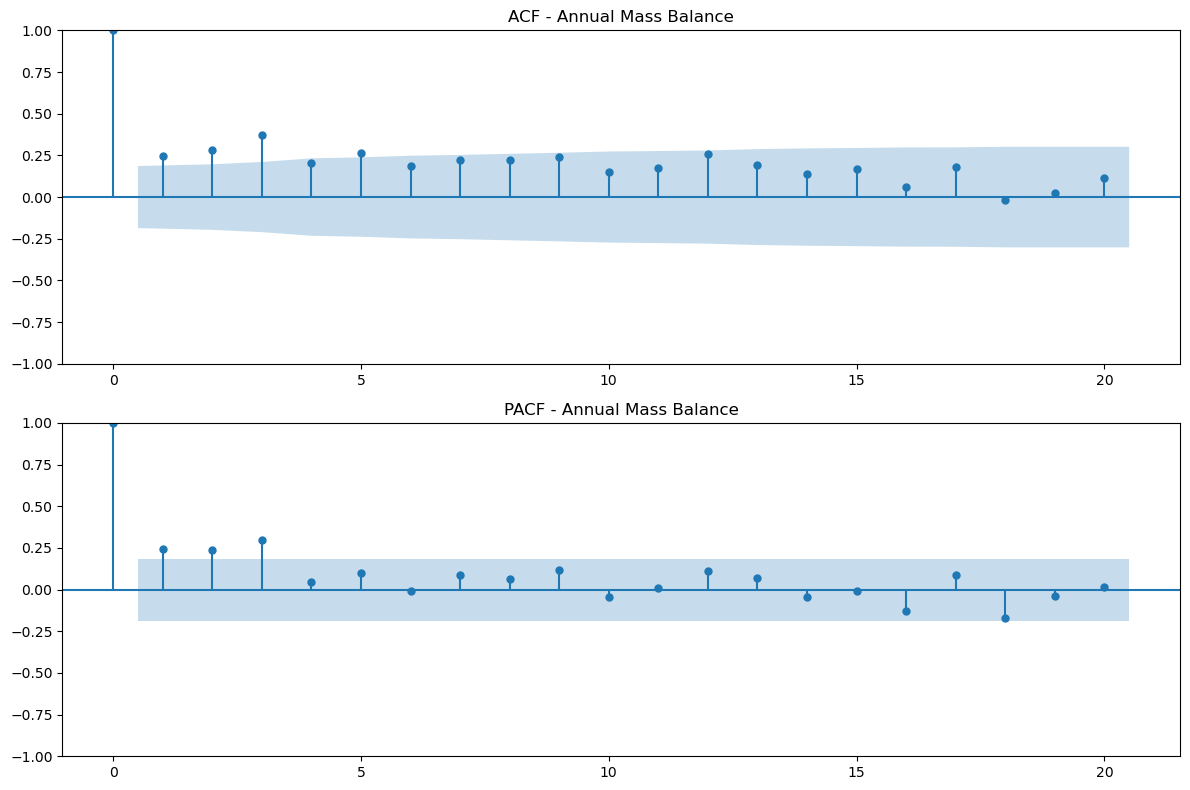

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 8))
plot_acf(aletsch_mb_hy_df['annual mass balance (mm w.e.)'].dropna(), lags = 20, ax=ax1, title = 'ACF - Annual Mass Balance')
plot_pacf(aletsch_mb_hy_df['annual mass balance (mm w.e.)'].dropna(), lags = 20, ax=ax2, title = 'PACF - Annual Mass Balance')
plt.tight_layout()
plt.show()

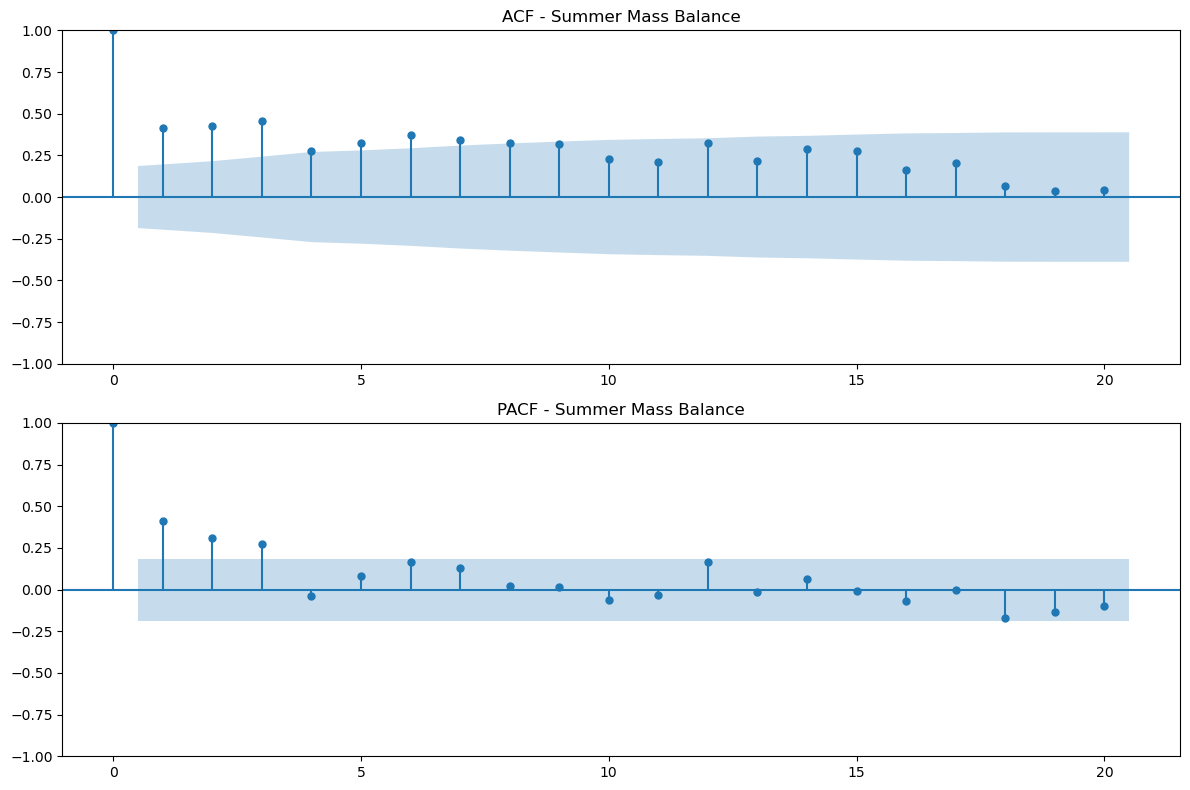

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 8))
plot_acf(aletsch_mb_hy_df['summer mass balance (mm w.e.)'].dropna(), lags = 20, ax=ax1, title = 'ACF - Summer Mass Balance')
plot_pacf(aletsch_mb_hy_df['summer mass balance (mm w.e.)'].dropna(), lags = 20, ax=ax2, title = 'PACF - Summer Mass Balance')
plt.tight_layout()
plt.show()

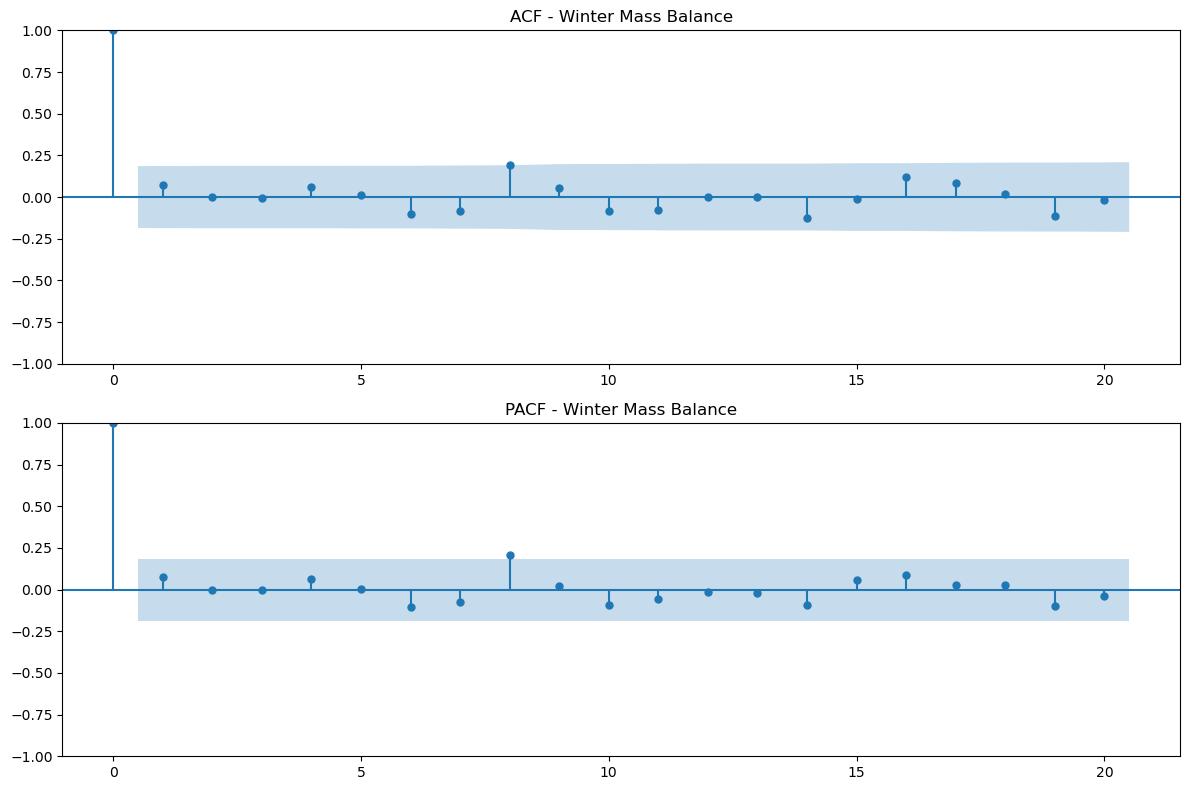

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 8))
plot_acf(aletsch_mb_hy_df['winter mass balance (mm w.e.)'].dropna(), lags = 20, ax=ax1, title = 'ACF - Winter Mass Balance')
plot_pacf(aletsch_mb_hy_df['winter mass balance (mm w.e.)'].dropna(), lags = 20, ax=ax2, title = 'PACF - Winter Mass Balance')
plt.tight_layout()
plt.show()